# Traffy Fondue data samples
The data from this analysis is taken from the traffy API

In [1]:
# setup pandas and read the csv file

import pandas as pd
import numpy as np
import folium

df_import = pd.read_csv('df_traffy.csv')

print(df_import.shape)
print(df_import.columns)


(1000, 19)
Index(['message_id', 'type', 'type_id', 'org', 'comment', 'ticket_id',
       'coords', 'photo', 'after_photo', 'address', 'district', 'subdistrict',
       'province', 'timestamp', 'problem_type_abdul', 'status', 'star',
       'count_reopen', 'state'],
      dtype='object')


# data cleaning
1. Remove duplicates
2. Remove NaN (missing value lines)

This set of sample data is collected via the Traffy API, and contains samples across several month, from June 2022 until December 2022.


In [2]:
#drop duplicates
df_dup = df_import.drop_duplicates('message_id')
df_dup.shape

#drop NaN
df_clean = df_dup.dropna(subset=['message_id','type'])
df_clean.shape

(830, 19)

Lets check the timestamps for duplicates
- Looks like no duplicates, but need to be sure.

In [3]:
df_traffydata = df_clean.drop_duplicates('timestamp')
df_traffydata.shape

(830, 19)

In [4]:
# enabling full column display
pd.set_option('display.max_columns', None)
df_traffydata.head(2)

,message_id,type,type_id,org,comment,ticket_id,coords,photo,after_photo,address,district,subdistrict,province,timestamp,problem_type_abdul,status,star,count_reopen,state
0,292562.0,ทางเท้า,6,กรุงเทพมหานคร,ฟุตบาทแตกเป็นหลุม,2022-MPNV4C,"['100.61019', '13.68130']",https://storage.googleapis.com/traffy_public_b...,NaN,3225 ถ. สุขุมวิท แขวง บางนา เขตบางนา กรุงเทพมห...,บางนา,บางนาเหนือ,กรุงเทพมหานคร,2022-12-12 10:37:30.924196+00:00,{ทางเท้า},report,NaN,0,รอรับเรื่อง
3,292559.0,"ต้นไม้,ห้องน้ำ",28,กรุงเทพมหานคร,ห้องน้ำในสวนหลวง​ร.9​ น่าจะแตกเหม็นมาก​ ต้นไม้...,2022-A6TF69,"['100.66119', '13.68749']",https://storage.googleapis.com/traffy_public_b...,NaN,MMP6+XF กรุงเทพมหานคร ประเทศไทย,ประเวศ,หนองบอน,กรุงเทพมหานคร,2022-12-12 10:32:52.165067+00:00,"{ต้นไม้,ห้องน้ำ}",report,NaN,0,รอรับเรื่อง


# Language support
This section will translate the types, organization, status, and city region and location names.

In [5]:
type = {
    'อื่นๆ':'Other',
    'ถนน':'Road',
    'ทางเท้า':'Sidewalk',
    'น้ำท่วม':'Flood',
    'แสงสว่าง':'Light',
    'ความปลอดภัย':'Safety',
    'ความสะอาด':'Cleanliness',
    'ท่อระบายน้ำ':'Drain',
    'สะพาน':'Bridge',
    'กีดขวาง':'Obstruction',
    'จราจร':'Traffic',  
    'สายไฟ':'electric wires',
    'คลอง':'Canal',
    'ต้นไม้':'Tree',
    'เสียงรบกวน':'Noise',
    'สัตว์จรจัด':'Stray animals',
    'ป้าย':'Signage',
    'ร้องเรียน':'Complaint',
    'เสนอแนะ':'Suggestion',
    'คนจรจัด':'Homeless',
    'การเดินทาง':'Journey',
    'สอบถาม':'Inquiry',
    'ห้องน้ำ':'Bathroom',
    'PM2.5':'PM2.5',
    'ป้ายจราจร':'Traffic Signs'
}

#state should be the same as status
state = {
    'ส่งเรื่องแล้ว':'Submitted',
    'กำลังดำเนินการ':'In progress',
    'เสร็จสิ้น':'finish',
    'ส่งต่อ(ใหม่)':'Forward(New)',
    'ของบประมาณ':'Ask for a budget.',
    'รอรับเรื่อง':'Waiting to get the story.',
    'ไม่เกี่ยวข้อง':'Irrelevant.'
}

statelistkey = list(state)

In [6]:
print(statelistkey[0])

ส่งเรื่องแล้ว


In [7]:
#df_traffydata.head(50)

# extract only the columns needed for analysis
df_traffycol = df_traffydata[["message_id","type", "coords", "timestamp", "status", "star",
       "count_reopen", "state"]]

#add a typecode column and a statuscode column and in star and count_reopen change NaN to 0
# Replace on multiple columns in star and count_reopen
df_traffycol[["star","count_reopen"]] = df_traffycol[["star","count_reopen"]].fillna(0)
#add statuscode and typecode column
statuscode = []
for s in df_traffycol.loc[:,"state"]:
       if s in state:
              indexvalue = statelistkey.index(s)
              statuscode.append(indexvalue)
       else:
              statuscode.append(-1)


#print(statuscode)
df_traffycol["statuscode"]= statuscode

# Add empty column with translated name of type
#print(df_traffycol['type'].value_counts())
for t in type:
#       print("key: ", t, " English: ", type[t])
#       print(df_traffycol['type'].str.contains(t).value_counts())
       #add empty col with new colname
       df_traffycol[type[t]]= 0
df_traffycol.columns

/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_86254/3116406878.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffycol[["star","count_reopen"]] = df_traffycol[["star","count_reopen"]].fillna(0)
/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_86254/3116406878.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffycol["statuscode"]= statuscode
/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_86254/3116406878.py:29: SettingWithCopyWarning: 
A value is trying to

Index(['message_id', 'type', 'coords', 'timestamp', 'status', 'star',
       'count_reopen', 'state', 'statuscode', 'Other', 'Road', 'Sidewalk',
       'Flood', 'Light', 'Safety', 'Cleanliness', 'Drain', 'Bridge',
       'Obstruction', 'Traffic', 'electric wires', 'Canal', 'Tree', 'Noise',
       'Stray animals', 'Signage', 'Complaint', 'Suggestion', 'Homeless',
       'Journey', 'Inquiry', 'Bathroom', 'PM2.5', 'Traffic Signs'],
      dtype='object')

In [8]:
#add a status code column assign na
df_traffycol['statuscode']= np.nan

In [9]:
df_traffycol.shape

(830, 34)

In [10]:
val = statelistkey.index('เสร็จสิ้น')
print(str(val))

2


In [11]:
# code the type string into values in translated type columns
nrows = df_traffycol.shape[0]
for index in range(nrows):#df_traffycol['type'].index:
    try:
        typestring = df_traffycol['type'].iloc[index]
    except IndexError:
        print("Index error - Index: "+ str(index))
    tstring = typestring.split(",")
    #print(tstring)
    for t in tstring:
        if t in typestring:
            df_traffycol[type[t]].iloc[index] = 1
    #        print("TRUE type: "+type[t]+" t: "+t)
        else:
            df_traffycol[type[t]].iloc[index] = 0
    #        print("FALSE type: "+type[t]+" t: "+t)
        #df_traffycol[type[t]] = found
    #print("idex: "+str(index))
    #print(df_traffycol.iloc[index])
    if df_traffycol['state'].iloc[index] in state:
        df_traffycol['statuscode'].iloc[index]= statelistkey.index(df_traffycol['state'].iloc[index])
    
    #

/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_86254/2151275940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffycol[type[t]].iloc[index] = 1
/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_86254/2151275940.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffycol['statuscode'].iloc[index]= statelistkey.index(df_traffycol['state'].iloc[index])


In [12]:
df_traffycol.columns

Index(['message_id', 'type', 'coords', 'timestamp', 'status', 'star',
       'count_reopen', 'state', 'statuscode', 'Other', 'Road', 'Sidewalk',
       'Flood', 'Light', 'Safety', 'Cleanliness', 'Drain', 'Bridge',
       'Obstruction', 'Traffic', 'electric wires', 'Canal', 'Tree', 'Noise',
       'Stray animals', 'Signage', 'Complaint', 'Suggestion', 'Homeless',
       'Journey', 'Inquiry', 'Bathroom', 'PM2.5', 'Traffic Signs'],
      dtype='object')

In [13]:
df_traffycol.head()

,message_id,type,coords,timestamp,status,star,count_reopen,state,statuscode,Other,Road,Sidewalk,Flood,Light,Safety,Cleanliness,Drain,Bridge,Obstruction,Traffic,electric wires,Canal,Tree,Noise,Stray animals,Signage,Complaint,Suggestion,Homeless,Journey,Inquiry,Bathroom,PM2.5,Traffic Signs
0,292562.0,ทางเท้า,"['100.61019', '13.68130']",2022-12-12 10:37:30.924196+00:00,report,0.0,0,รอรับเรื่อง,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,292559.0,"ต้นไม้,ห้องน้ำ","['100.66119', '13.68749']",2022-12-12 10:32:52.165067+00:00,report,0.0,0,รอรับเรื่อง,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,292557.0,ความปลอดภัย,"['100.55660', '13.73383']",2022-12-12 10:27:23.253628+00:00,report,0.0,0,รอรับเรื่อง,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,292555.0,สัตว์จรจัด,"['100.48074', '13.78423']",2022-12-12 10:23:51.384804+00:00,report,0.0,0,รอรับเรื่อง,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,292553.0,ถนน,"['100.65025', '13.78603']",2022-12-12 10:19:17.058672+00:00,report,0.0,0,รอรับเรื่อง,5.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_traffycol.shape

(830, 34)

In [15]:
df_traffy_corr = df_traffycol[['Road', 'Sidewalk',
       'Flood', 'Light', 'Safety', 'Cleanliness', 'Drain', 'Bridge',
       'Obstruction', 'Traffic', 'electric wires', 'Canal', 'Tree', 'Noise',
       'Stray animals', 'Signage', 'Complaint', 'Suggestion', 'Homeless',
       'Journey', 'Inquiry', 'Bathroom', 'PM2.5', 'Traffic Signs']]

df_traffy_corr.corr()

,Road,Sidewalk,Flood,Light,Safety,Cleanliness,Drain,Bridge,Obstruction,Traffic,electric wires,Canal,Tree,Noise,Stray animals,Signage,Complaint,Suggestion,Homeless,Journey,Inquiry,Bathroom,PM2.5,Traffic Signs
Road,1.000000,-0.102364,0.027111,-0.050564,0.038878,-0.207815,-0.052682,-0.038391,-0.068289,0.047882,-0.056433,0.014213,-0.079598,0.041961,-0.035389,-0.050077,0.003009,-0.033488,-0.027326,0.010764,0.013783,-0.033488,NaN,-0.019311
Sidewalk,-0.102364,1.000000,-0.051366,-0.132025,0.049298,-0.142946,-0.047953,-0.027022,0.075134,-0.089654,-0.062747,-0.007631,-0.013121,-0.077938,-0.025856,-0.095305,0.016282,0.030168,-0.020889,-0.039199,-0.025600,-0.025600,NaN,-0.014762
Flood,0.027111,-0.051366,1.000000,-0.079934,-0.034297,-0.054904,0.083955,-0.043645,-0.044974,-0.041361,-0.037486,-0.027857,-0.033253,-0.030956,-0.027200,-0.047967,-0.034352,-0.010168,-0.008297,-0.015570,-0.010168,0.112143,NaN,-0.005863
Light,-0.050564,-0.132025,-0.079934,1.000000,0.089892,-0.209603,-0.103962,0.057550,-0.126136,-0.102527,-0.016813,-0.000561,-0.060408,-0.069263,-0.056449,-0.098985,-0.080404,-0.028518,0.040264,-0.009604,-0.028518,-0.028518,NaN,0.073353
Safety,0.038878,0.049298,-0.034297,0.089892,1.000000,-0.131305,-0.001495,0.088605,0.049852,-0.033578,0.034491,0.040623,0.035359,-0.063149,-0.005645,-0.082963,0.030067,-0.020742,0.062893,0.011034,-0.020742,-0.020742,NaN,-0.011961
Cleanliness,-0.207815,-0.142946,-0.054904,-0.209603,-0.131305,1.000000,-0.109675,-0.074151,-0.091758,-0.108457,-0.082914,0.008008,-0.052864,-0.081173,-0.071322,-0.063874,-0.006784,-0.026662,-0.021757,-0.005232,-0.026662,-0.026662,NaN,-0.015375
Drain,-0.052682,-0.047953,0.083955,-0.103962,-0.001495,-0.109675,1.000000,-0.042752,-0.066001,-0.060700,-0.055012,-0.040881,-0.048801,-0.016335,-0.039917,-0.050761,-0.023997,-0.014922,-0.012176,0.033593,-0.014922,0.071086,NaN,-0.008605
Bridge,-0.038391,-0.027022,-0.043645,0.057550,0.088605,-0.074151,-0.042752,1.000000,-0.028897,0.022703,-0.057406,0.050192,-0.050924,-0.047406,0.084985,-0.016724,-0.001717,-0.015571,0.088698,-0.023843,0.067275,-0.015571,NaN,-0.008979
Obstruction,-0.068289,0.075134,-0.044974,-0.126136,0.049852,-0.091758,-0.066001,-0.028897,1.000000,0.039514,-0.013375,-0.013805,-0.001385,-0.048849,-0.042921,-0.057268,0.020160,-0.016045,-0.013093,-0.024569,-0.016045,-0.016045,NaN,-0.009252
Traffic,0.047882,-0.089654,-0.041361,-0.102527,-0.033578,-0.108457,-0.060700,0.022703,0.039514,1.000000,-0.054402,-0.040427,-0.048259,0.013842,-0.006279,-0.010129,0.030182,-0.014756,-0.012041,-0.022595,0.072107,-0.014756,NaN,-0.008509


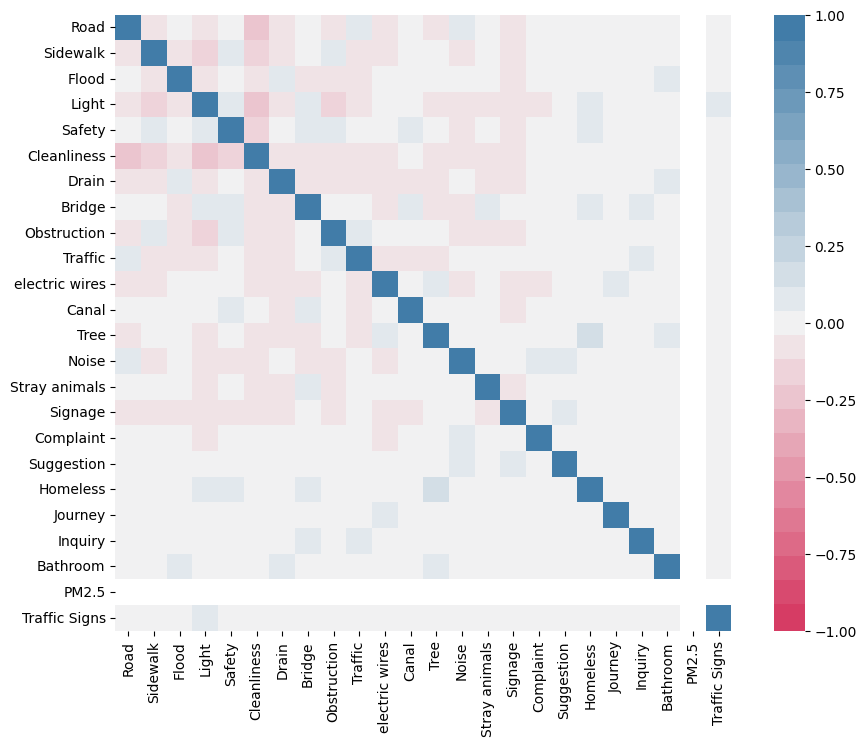

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

dims = (11, 8)
fig = plt.subplots(figsize=dims)
correlation_full_health = df_traffy_corr.corr().round(3)

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(2, 600, n=25),
square=True, annot=False
)

plt.show()

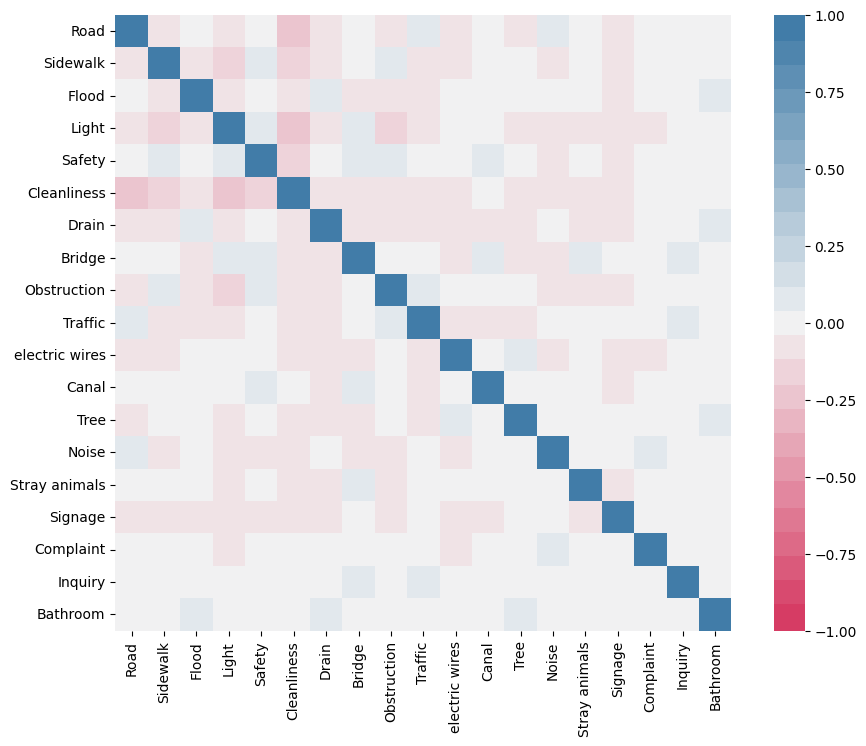

In [17]:
df_tfy_corr = df_traffycol[['Road', 'Sidewalk',
       'Flood', 'Light', 'Safety', 'Cleanliness', 'Drain', 'Bridge',
       'Obstruction', 'Traffic', 'electric wires', 'Canal', 'Tree', 'Noise',
       'Stray animals', 'Signage', 'Complaint', 'Inquiry', 'Bathroom']]

dims = (11, 8)
fig = plt.subplots(figsize=dims)
correlation_full_health = df_tfy_corr.corr().round(3)

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(2, 600, n=25),
square=True, annot=False
)

plt.show()

<AxesSubplot: >

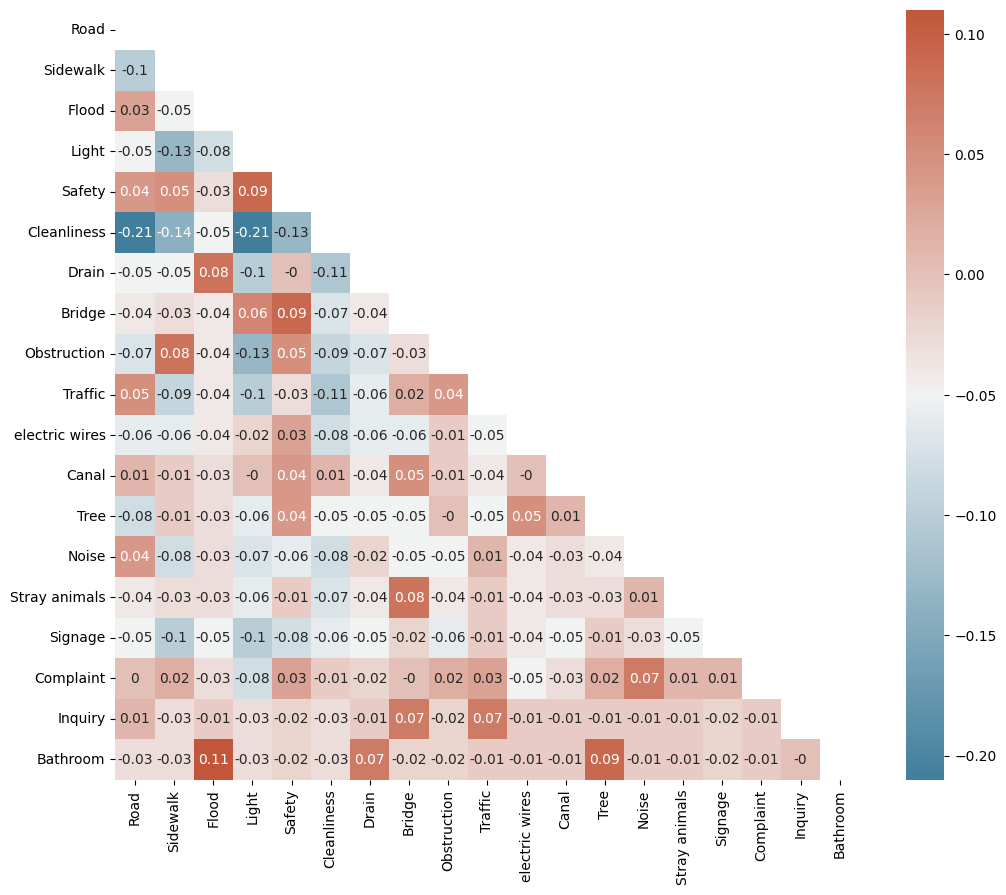

In [18]:
# Correlation between different variables
#
corr = df_tfy_corr.corr().round(2)
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [19]:
df_test=df_traffycol[['state']]
df_state_cnt =df_test.groupby('state').value_counts().reset_index(name='Count')
indx=0
for i in df_state_cnt['state']:
    print("i: "+i+" state: "+state[i])
    df_state_cnt['state'].iloc[indx] =state[i]
    indx = indx+1

df_state_cnt['percent'] = (df_state_cnt['Count'] / 
                  df_state_cnt['Count'].sum()) * 100
df_state_cnt

i: กำลังดำเนินการ state: In progress
i: รอรับเรื่อง state: Waiting to get the story.
i: ส่งต่อ(ใหม่) state: Forward(New)
i: เสร็จสิ้น state: finish


/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_86254/1560091780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_cnt['state'].iloc[indx] =state[i]


,state,Count,percent
0,In progress,342,41.204819
1,Waiting to get the story.,304,36.626506
2,Forward(New),2,0.240964
3,finish,182,21.927711


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#dims = (11, 8)
#fig, ax = plt.subplots(figsize=dims)

keys=['In progress','Ask for a budget.','Waiting to get the story.',
    'Forward(New)','finish',
    'Irrelevant.']

data=df_state_cnt['percent']

sns.barplot(x=data, y=keys)

#sns.barplot(ax=ax,data=df_state_cnt, x='state', y='Count', hue="state")

plt.show ()

KeyError: 'In progress'

# working with timeseries
This section will produce data from the data set over time.
Since the data represent a sample from the total, the results will be presented in percent.

In [ ]:
# Number of complaints submited over time per day
# use the timestamp to extract the day and count the number of cases status submitted and finished and in progress

df_submitted = df_traffycol[['timestamp','status','state','statuscode']]
df_submitted['month'] = pd.DatetimeIndex(df_submitted['timestamp']).month
df_submitted = df_submitted[['month','status']]
df_subresult = df_submitted[df_submitted['status'].str.contains("inprogress" or "finish")].value_counts().reset_index(name='Count')
#df_subresult = df_submitted.groupby('month')['status'].value_counts().reset_index(name='Count')
df_subresult.sort_values('month')

#df_submitted['timestamp'] = pd.to_datetime(df_submitted['timestamp']).dt.date

#df_submitted['year'] = pd.DatetimeIndex(df_submitted['timestamp']).year
#df_submitted['month'] = pd.DatetimeIndex(df_submitted['timestamp']).month
#grouped = df_submitted.groupby(['timestamp'])['state']
#df_sub_grp = grouped.value_counts().reset_index(name='count')

#df_sub_grp.shape
#df_count = df_index.groupby(['timestamp'])['type'].value_counts().reset_index(name='Count')

#df_index.groupby(["timestamp", "type"]).agg(
#    count_col=pd.NamedAgg(column="type", aggfunc="type")
#)
#df_series = df_index.pivot_table(
#        index = ["timestamp", "type"],
#        #values = "count",
#        aggfunc = "count"
#)
#df_index= df_index['timestamp']= pd.to_datetime(df_index['timestamp']).dt.date

#df_plot = df_index.groupby(['timestamp', 'status']).size()
#print(df_ploit)

#df_traffycol.groupby(['timestamp','type']).value_counts()

#df1 = df_traffycol.groupby(['timestamp'])['type'].value_counts().reset_index(name='Count')
#df1

#df1= df_traffycol.groupby(['timestamp'])['type'].value_counts().reset_index(name='Count')#.where(df_traffycol['type'].str.contains('ถนน'))

#options = ['ทางเท้า'] 
#df2 = df1.loc[df1['type'].isin(options)]
#df2#.dropna()

#df2=df_ploit.reset_index(name='Count')#.unstack([2])
#df_series.head()


/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_38345/3765551594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_submitted['month'] = pd.DatetimeIndex(df_submitted['timestamp']).month


,month,status,Count
3,5,inprogress,986
5,6,inprogress,877
4,7,inprogress,942
2,8,inprogress,1033
6,9,inprogress,469
0,10,inprogress,1451
1,11,inprogress,1205


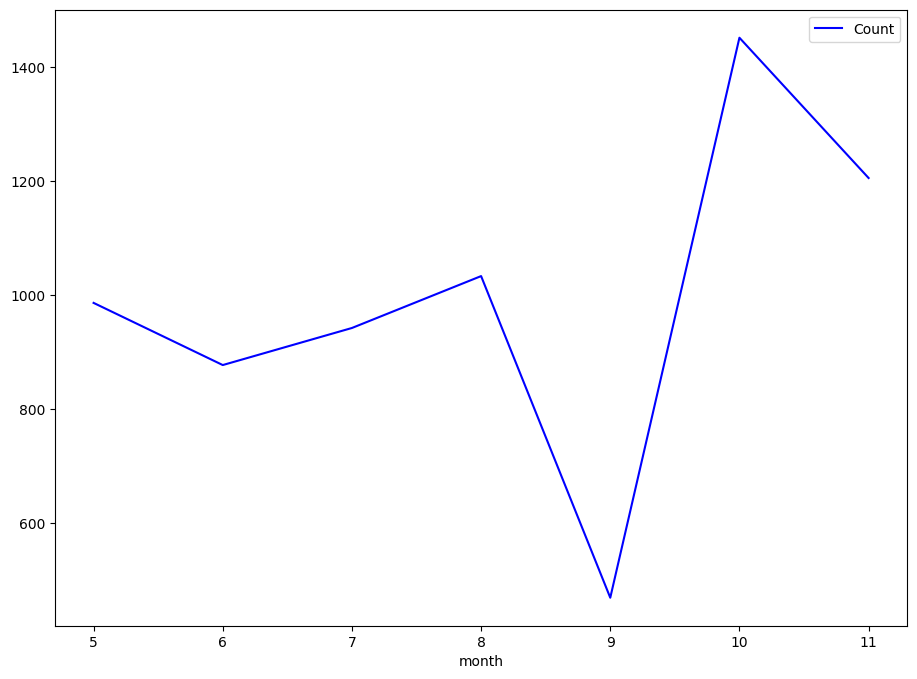

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

dims = (11, 8)
fig = plt.subplots(figsize=dims)
ax = plt.gca()

#data=df_types
df_subresult.sort_values('month').plot(kind='line',x='month',y='Count', color='blue',ax=ax)


plt.show()

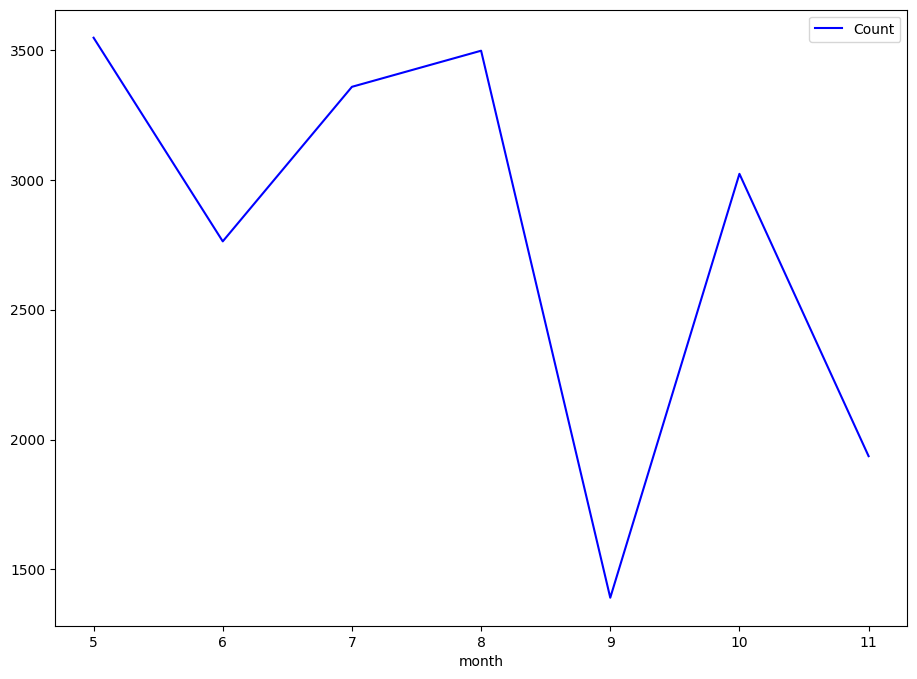

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

dims = (11, 8)
fig = plt.subplots(figsize=dims)
ax = plt.gca()

#data=df_types
df_subresult.plot(kind='line',x='month',y='Count', color='blue',ax=ax)


plt.show()

In [ ]:
df_sub_grp.shape

(205, 3)

/Users/michaelhansen/Documents/thammasat/Thammasat_PhD_Research/github/traffy-bangkok-2022/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/michaelhansen/Documents/thammasat/Thammasat_PhD_Research/github/traffy-bangkok-2022/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/michaelhansen/Documents/thammasat/Thammasat_PhD_Research/github/traffy-bangkok-2022/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/michaelhansen/Documents/thammasat/Thammasat_PhD_Research/github/traffy-bangkok-2022/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarni

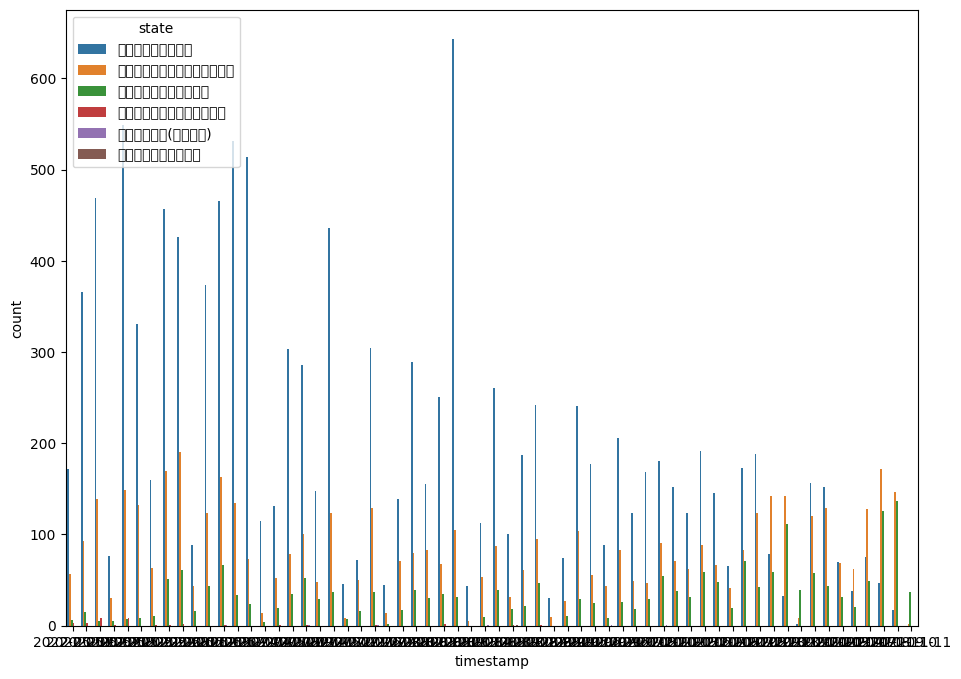

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dims = (11, 8)
fig, ax = plt.subplots(figsize=dims)

sns.barplot(ax=ax,data=df_sub_grp, x='timestamp', y='count', hue="state")
#new_labels = ['finish', 'In progress']
"""
'ส่งเรื่องแล้ว':'Submitted',
    'กำลังดำเนินการ':'In progress',
    'เสร็จสิ้น':'finish',
    'ส่งต่อ(ใหม่)':'Forward(New)',
    'ของบประมาณ':'Ask for a budget.',
    'รอรับเรื่อง':'Waiting to get the story.',
    'ไม่เกี่ยวข้อง':'Irrelevant.'
"""
#plt.legend(labels=['finish', 'In progress'])
plt.show ()
#plt.plot(df_ploit)
#plt.ylabel('some numbers')
#plt.show()


In [51]:
df_traffycol_loc = df_traffycol#['coords', 'type']
import folium
import geopandas
import re

map_hooray = folium.Map(location=[13.68130,100.61019],
                    zoom_start = 11)
map_hooray

for index, row in df_traffycol.iterrows():
    lat = row['coords']
    print(lat)
    for t in lat.split():
        n = float(re.findall(r'\d+\.\d+',t)[0])*2
        print(str(n))
    print(re.findall(r'\d+\.\d+', lat))

   # print("row: "+row['coords']+ " lat: "+lat+" lon: "+lon)
    if index <= 1:
        break
#df_traffycol_loc.head()
#map = folium.Map(location=[df_traffycol_loc.Latitude.mean(), df_traffycol_loc.Longitude.mean()], 
 #                   zoom_start=14, control_scale=True)

['100.61019', '13.68130']
201.22038
27.3626
['100.61019', '13.68130']
